# Análise de Dados com Linguagem Python - Análise de Dados de RH (Recursos Humanos)

## Definição do Problema
---
Uma empresa de consultoria que atua em Big Data e Data Science deseja contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa.
Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou estão apenas fazendo o treinamento para retornarem ao mercado à procura de um novo emprego. O objetivo é contratar os profissionais com perfil adequado, a fim de reduzir o custo e o tempo de contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos.
Informações relacionadas a dados demográficos, educação e experiência estão disponíveis no conjunto de dados fornecido.

## Objetivo
---
Realizar um extenso trabalho de análise nos dados, compreender como estão organizados, realizar limpeza e transformação dos dados conforme necessário, detectar eventuais padrões e diagnósticos e ao final emitir um parecer com um resumo sobre os dados.



## Fonte dos Dados
---
![Kaggle](https://miro.medium.com/max/837/1*tI-TWV--K05xbXUgA4Qm1w.png)  
Os dados estão disponíveis na plataforma Kaggle acessando o link: [HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/version/1?select=sample_submission.csv)

## Dicionário de Variáveis
---
**enrollee_id**: ID única por candidato

**city**: Código da cidade

**city_ development _index**: Índice de Desenvolvimento da Cidade (escalado)

**gender**: Gênero do candidato

**relevent_experience**: Experiência relevante do candidato

**enrolled_university**: Tipo de curso universitário matriculado, se houver

**education_level**: Nível de educação do candidato

**major_discipline**:Disciplina principal do candidato

**experience**: Experiência total do candidato em anos

**company_size**: Número de empregados na empresa atual do candidato

**company_type**: Tipo de empregador atual

**lastnewjob**: Diferença de anos entre o emprego anterior e o atual

**training_hours**: Horas de treinamento completadas

**target**: 0 – Não procura mudança de emprego, 1 – Procura mudança de emprego

## Instalando e Carregando os Pacotes Python

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste projeto:', python_version())

Versão da Linguagem Python usada neste projeto: 3.9.7


In [2]:
# Instalação de pacotes.

# Pacote para auxiliar na criação de mapas de valores ausentes.
!pip install -q missingno

# Pacote para categorizar variáveis
!pip install -q category_encoders

# Pacote para criação de gráficos
!pip install -q plotly

In [3]:
# Imports 

# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


## Carregando os Dados

In [4]:
# Dataset
df = pd.read_csv('dataset/aug_train.csv')

In [5]:
# Shape
row_n, column_n = df.shape
print(f'Número de linhas: {row_n} \nNúmero de colunas: {column_n}')

Número de linhas: 19158 
Número de colunas: 14


In [6]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
# Info de cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória dos Dados (EDA)

In [9]:
# Descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [10]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


 - Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e desvio padrão 0,123. Significa que a maioria dos candidatos é de cidades bem desenvolvidas.
 - Em **training_hours**, os valores médios são 65,367, mediana 47 e máx 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [11]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

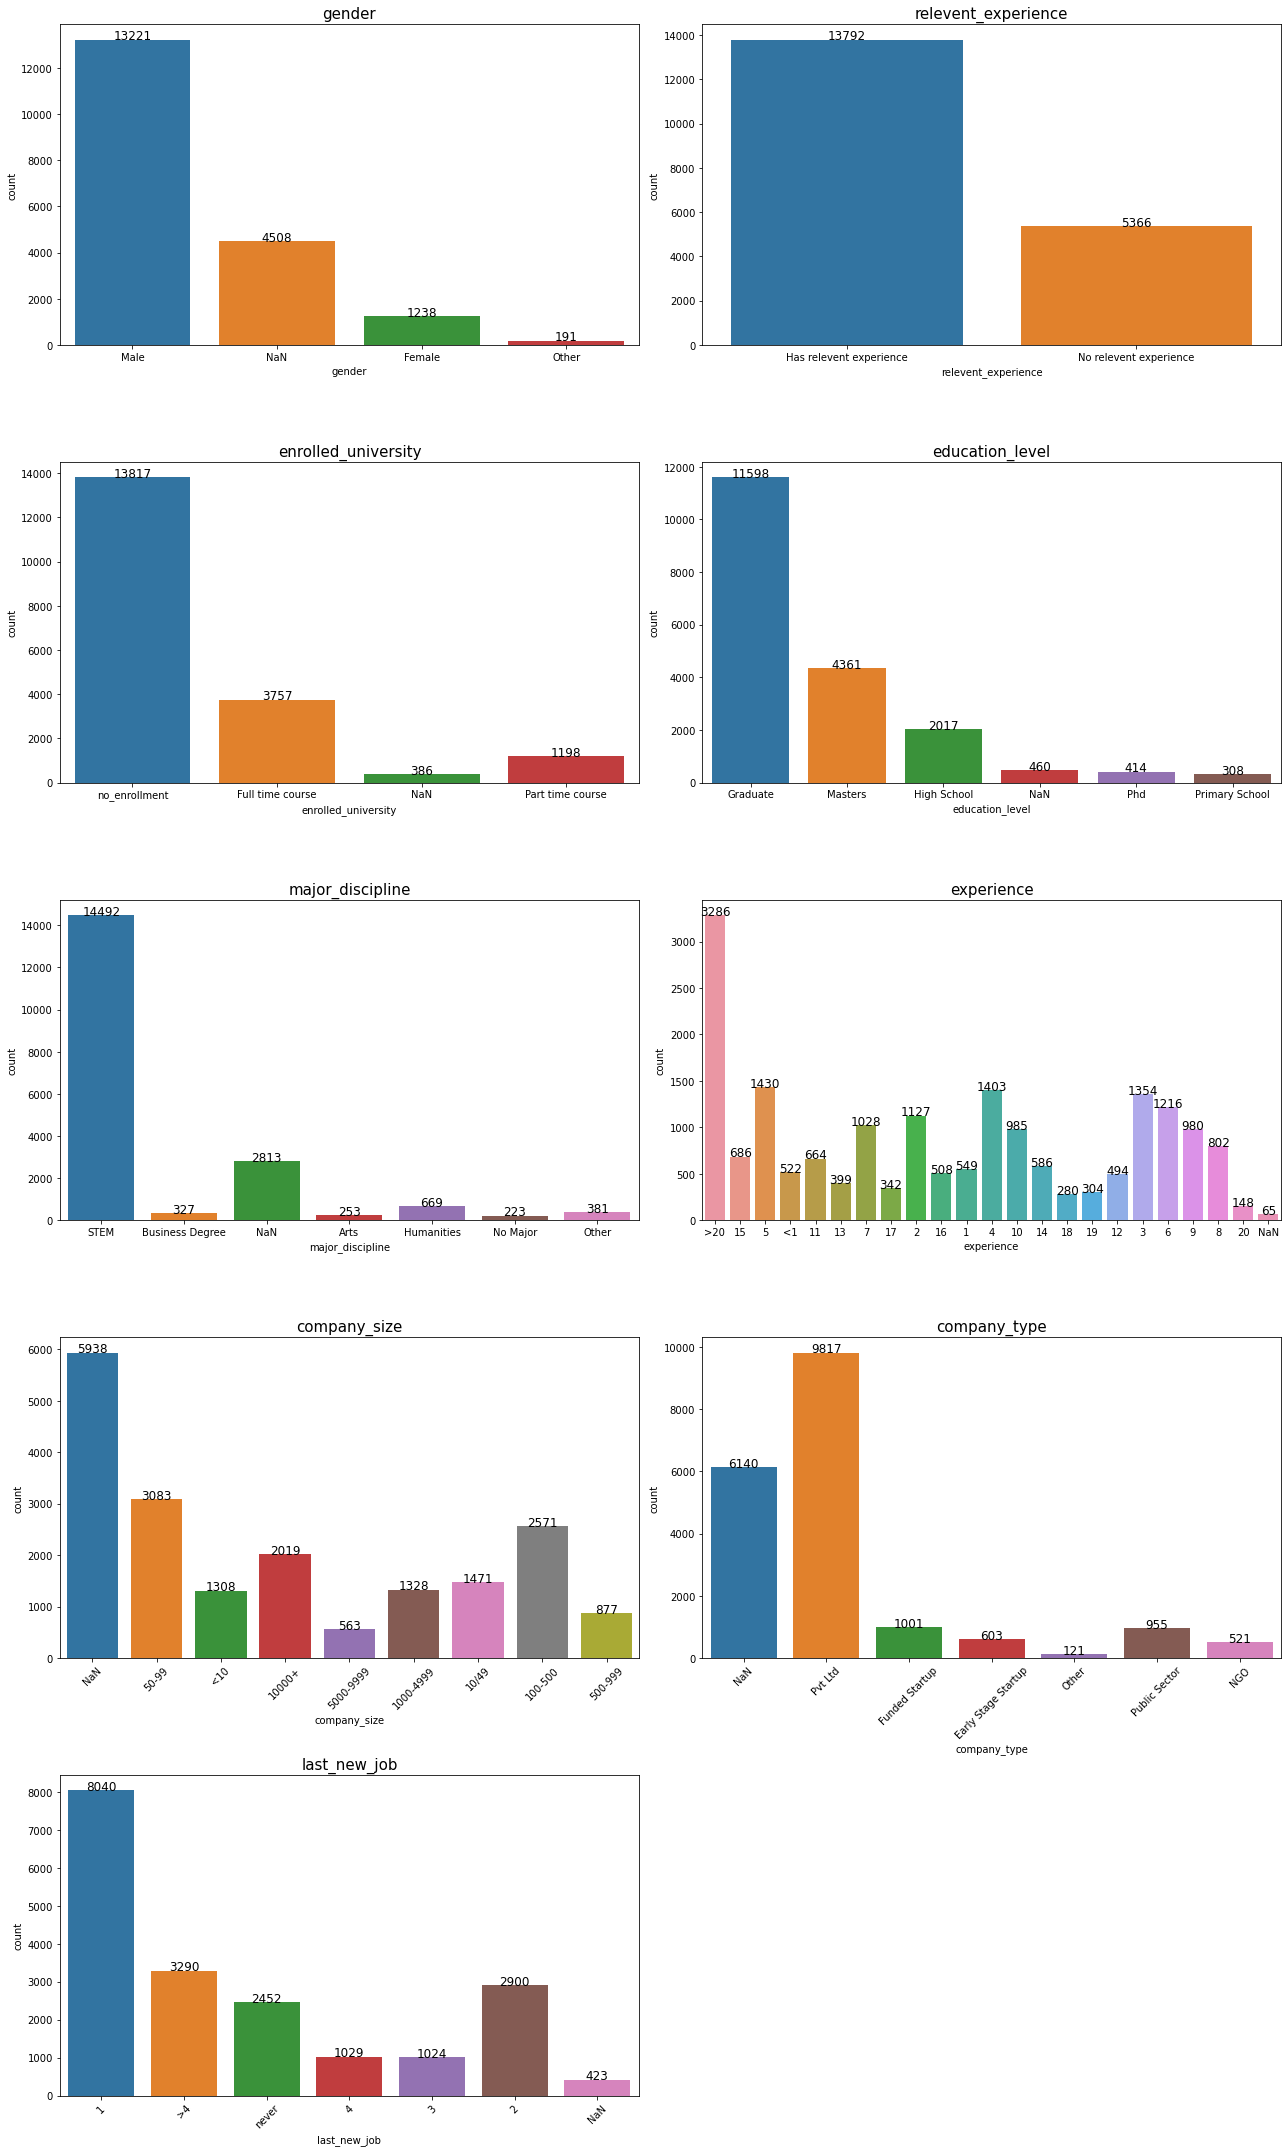

In [12]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))
           
# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0
           
# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=7:
        plt.xticks(rotation = 45)
                       
# Layout
plt.tight_layout(h_pad = 2)

# Os patches são os números que aparecem em cada barra

### Verificando a Distribuição das Variáveis Numéricas

In [13]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


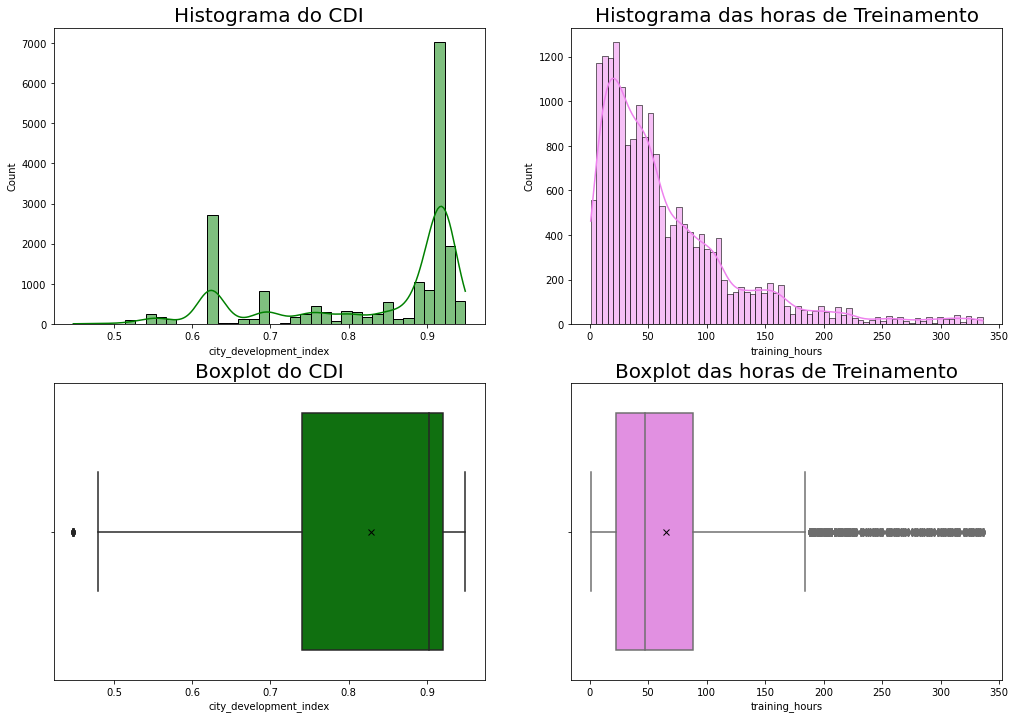

In [14]:
# Figura 
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(df['city_development_index'], kde = True, color = 'green')
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.color_palette('hls', 8)
sns.histplot(df['training_hours'], kde = True, color = 'violet')
plt.title('Histograma das horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = 'green', showmeans=True, meanprops={'marker':'x', 'markeredgecolor':'black'})
plt.title('Boxplot do CDI', fontsize = 20)

plt.subplot(224)
sns.boxplot(df['training_hours'], color = 'violet', showmeans=True, meanprops={'marker':'x', 'markeredgecolor':'black'})
plt.title('Boxplot das horas de Treinamento', fontsize = 20)

plt.show()

Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

![normal](imagens/normal.png)

![title](imagens/boxplot.jpg)

In [15]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
    # Checar valor-p
    if pval > .05:
        print(i, f': Distribuição Normal, pois tem o valor de {pval}')
    else:
        print(i, f': Distribuição Não Normal, pois tem o valor de {pval}')


city_development_index : Distribuição Não Normal, pois tem o valor de 0.0
training_hours : Distribuição Não Normal, pois tem o valor de 0.0


 - As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.
 - Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona.

### Correlação dos Dados